<a href="https://colab.research.google.com/github/17kamison/nba_player_stats-analyst_builder/blob/main/01_data_cleaning_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dataset and Pandas

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/all_seasons.csv', index_col=0)

# Data EPA


In [ ]:
# Display the first 5 rows of the DataFrame
df.head(5)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [ ]:
# Check for missing values
df.isna().sum()

,0
player_name,0
team_abbreviation,0
age,0
player_height,0
player_weight,0
college,1854
country,0
draft_year,0
draft_round,0
draft_number,0


In [ ]:
# Check the distribution of numericals columns
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


Reviewing max edge cases. Players only have 1-2 gp on the season. Will combat these edge cases with a min gp requirement

In [ ]:
# Identify and display rows where 'net_rating' is at its maximum value
rows_with_max_net_rating = df[df['net_rating'] == df['net_rating'].max()]
display(rows_with_max_net_rating)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
127,Bruce Bowen,MIA,26.0,200.66,90.7184,Cal State-Fullerton,USA,Undrafted,Undrafted,Undrafted,...,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0,1996-97


In [ ]:
# Identify and display rows where 'oreb_pct' (offensive rebound percentage) is at its maximum value
rows_with_max_oreb_pct = df[df['oreb_pct'] == df['oreb_pct'].max()]
display(rows_with_max_oreb_pct)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
8571,Jerrelle Benimon,DEN,23.0,203.0,111.0,NaN,USA,Undrafted,Undrafted,Undrafted,...,0.0,1.5,0.0,120.0,1.0,0.4,0.167,0.0,0.0,2014-15


In [ ]:
# Identify and display rows where 'dreb_pct' (defensive rebound percentage) is at its maximum value
rows_with_max_dreb_pct = df[df['dreb_pct'] == df['dreb_pct'].max()]
display(rows_with_max_dreb_pct)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
9371,Danuel House,WAS,24.0,200.66,97.52228,Texas A&M,USA,Undrafted,Undrafted,Undrafted,...,0.0,1.0,0.0,0.0,0.0,1.0,0.000,0.0,0.0,2016-17
9855,Chris Boucher,GSW,25.0,208.28,90.71840,Oregon,Canada,Undrafted,Undrafted,Undrafted,...,0.0,1.0,0.0,-100.0,0.0,1.0,0.333,0.0,0.0,2017-18


In [ ]:
# Identify and display rows where 'usg_pct' (usage percentage) is at its maximum value
rows_with_max_usg_pct = df[df['usg_pct'] == df['usg_pct'].max()]
display(rows_with_max_usg_pct)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
953,Gheorghe Muresan,NJN,28.0,231.14,137.438376,NaN,USA,1993,2,30,...,0.0,0.0,0.0,-200.0,0.0,0.0,1.0,0.0,0.0,1998-99


In [ ]:
# Identify and display rows where 'ts_pct' (true shooting percentage) is at its maximum value
rows_with_max_ts_pct = df[df['ts_pct'] == df['ts_pct'].max()]
display(rows_with_max_ts_pct)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
9608,Naz Mitrou-Long,UTA,24.0,193.04,98.883056,Iowa State,Canada,Undrafted,Undrafted,Undrafted,...,3.0,0.0,0.0,250.0,0.0,0.0,0.500,1.5,0.000,2017-18
9898,Anthony Brown,MIN,25.0,200.66,101.604608,Stanford,USA,2015,2,34,...,3.0,0.0,1.0,30.0,0.0,0.0,0.100,1.5,0.333,2017-18
10545,Jordan Sibert,ATL,26.0,193.04,84.821704,University of Dayton,USA,Undrafted,Undrafted,Undrafted,...,3.0,0.0,0.0,-36.7,0.0,0.0,0.083,1.5,0.000,2018-19


# Data Cleaning

In [ ]:
# Drop columns that are not relevant for the current analysis
df = df.drop(columns=['college', 'country', 'draft_round', 'draft_number'])

In [ ]:
# Display the first 5 rows of the DataFrame after dropping columns to verify changes
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,1996,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,1994,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,1993,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,1989,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,1995,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [ ]:
# Convert the 'season' column from a string (e.g., '1996-97') to an integer (e.g., 1996)
df['season'] = df['season'].str.split('-').str[0].astype(int)

In [ ]:
# Check the unique values in the 'draft_year' column, including 'Undrafted' players
df['draft_year'].unique()

array(['1996', '1994', '1993', '1989', '1995', '1985', '1988', '1991',
       '1986', '1990', '1984', '1987', '1982', '1992', 'Undrafted',
       '1983', '1981', '1978', '1979', '1980', '1976', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '1963', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'], dtype=object)

In [ ]:
# Count the number of unique players who are listed as 'Undrafted'
df[df['draft_year'] == 'Undrafted']['player_name'].nunique()

776

In [ ]:
# Identify undrafted players
undrafted_players = df[df['draft_year'] == 'Undrafted']['player_name'].unique()

# For these players, find their minimum (rookie) season played
min_season_for_undrafted = df[df['player_name'].isin(undrafted_players)].groupby('player_name')['season'].min()

# Update the draft_year for these players to their rookie season
for player, min_season in min_season_for_undrafted.items():
    df.loc[(df['player_name'] == player) & (df['draft_year'] == 'Undrafted'), 'draft_year'] = min_season

# Calculate player experience based on current season minus draft year
df['experience'] = df['season'] - df['draft_year'].astype(int)

# Drop the original draft_year column
df.drop(columns=['draft_year'], inplace=True)

In [ ]:
# Standardize percentage columns by rounding their values to 3 decimal places
for col in ['oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']:
  df[col] = df[col].round(3)

In [ ]:
# Standardize 'player_weight' and 'player_height' columns by rounding their values to 1 decimal place
df['player_weight'] = df['player_weight'].round(1)
df['player_height'] = df['player_height'].round(1)

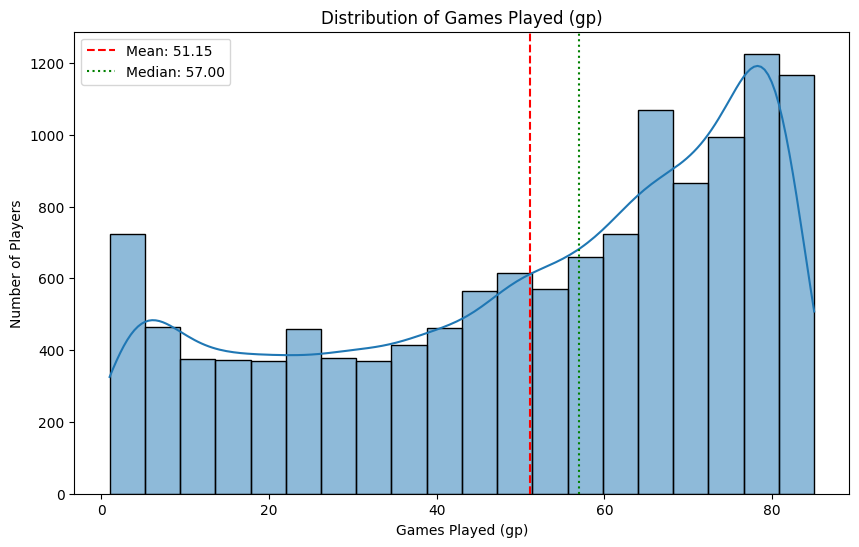

In [ ]:
# Create a histogram to visualize the distribution of 'gp' (games played)
plt.figure(figsize=(10, 6))
sns.histplot(df['gp'], bins=20, kde=True)
plt.title('Distribution of Games Played (gp)')
plt.xlabel('Games Played (gp)')
plt.ylabel('Number of Players')
plt.axvline(df['gp'].mean(), color='r', linestyle='--', label=f'Mean: {df['gp'].mean():.2f}') # Add vertical line for mean
plt.axvline(df['gp'].median(), color='g', linestyle=':', label=f'Median: {df['gp'].median():.2f}') # Add vertical line for median
plt.legend()
plt.show()

In [ ]:
# Filter the DataFrame to keep only records where players have played more than the mean number of games (51)
# This helps to remove players with very limited appearances, addressing edge cases identified earlier.
print(f'Number of rows before gp minimum: {df.shape[0]}')
df2 = df[df['gp'] > 51]
print(f'Number of rows after gp minimum: {df2.shape[0]}')
print(f'Total number of rows dropped: {df.shape[0] - df2.shape[0]}')

Number of rows before gp minimum: 12844
Number of rows after gp minimum: 7274
Total number of rows dropped: 5570


In [ ]:
# Generate descriptive statistics for the filtered DataFrame (df2) to understand the new data distribution
df2.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,experience
count,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000
mean,27.213500,200.523756,100.421584,70.185180,10.706241,4.443772,2.354949,-0.006351,0.053157,0.143408,0.191047,0.539077,0.140847,2009.416415,5.213775
std,4.237216,8.999094,12.230001,9.123935,5.857838,2.480921,1.925035,5.753744,0.037436,0.055982,0.049708,0.049089,0.090483,7.570501,3.987651
min,18.000000,160.000000,60.300000,52.000000,0.500000,0.400000,0.100000,-19.600000,0.003000,0.038000,0.037000,0.338000,0.007000,1996.000000,0.000000
25%,24.000000,193.000000,90.700000,63.000000,6.300000,2.600000,1.000000,-4.000000,0.022000,0.098000,0.156000,0.508000,0.074000,2003.000000,2.000000
50%,27.000000,200.700000,99.800000,72.000000,9.450000,3.900000,1.800000,0.100000,0.040000,0.132000,0.187000,0.538000,0.111000,2009.000000,4.000000
75%,30.000000,208.300000,108.900000,79.000000,14.000000,5.600000,3.100000,3.900000,0.082000,0.182000,0.222000,0.570000,0.188000,2016.000000,8.000000
max,43.000000,231.100000,154.200000,85.000000,36.100000,16.100000,11.700000,18.900000,0.203000,0.390000,0.408000,0.780000,0.543000,2022.000000,21.000000


In [ ]:
# Save the cleaned DataFrame
df2.to_csv('/content/drive/MyDrive/season_stats_cleaned.csv', index=False)